In [1]:
%matplotlib notebook

import sys, os
os.environ['PKG_CONFIG_PATH'] = '/ocean/projects/asc170022p/mtragoza/mambaforge/envs/lung-project/lib/pkgconfig'

import numpy as np
import pygalmesh
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

sys.path.append('..')
import mycode as code

--------------------------------------------------------------------------
but there are no active ports detected (or Open MPI was unable to use
them).  This is most certainly not what you wanted.  Check your
cables, subnet manager configuration, etc.  The openib BTL will be
ignored for this job.

  Local host: dv001
--------------------------------------------------------------------------


In [2]:
def plot_mesh(vertices, facets):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, projection='3d', aspect='equal')
    ax.plot_trisurf(*vertices.T, triangles=facets, cmap='Blues_r', linewidth=0.5, edgecolor='black', alpha=0.5)

In [3]:
v = np.array([
    [0, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [1, 0, 0]
])
f = np.array([
    [0, 1, 2],
    [0, 1, 3],
    [0, 2, 3],
    [1, 2, 3]
])

In [4]:
import meshplot
meshplot.jupyter()
meshplot.plot(v, f)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.5, 0.5,…

<IPython.core.display.Javascript object>


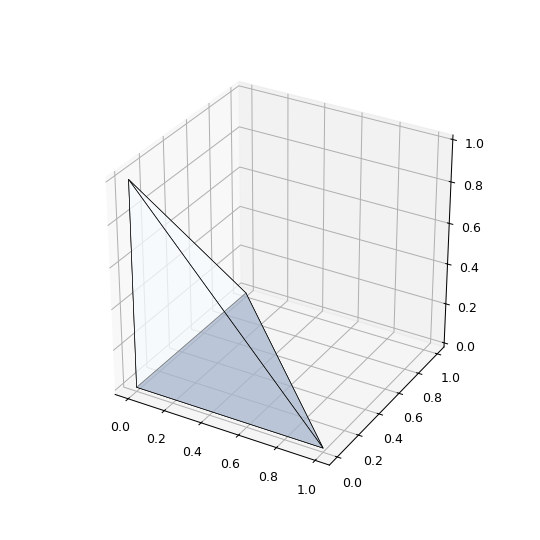

In [5]:
plot_mesh(v, f)

In [7]:
ball = pygalmesh.Ball([0,0,0], 1.0)
mesh = pygalmesh.generate_mesh(ball, max_cell_circumradius=0.2)
print(mesh.points.shape)
print(mesh.cells[0].data.shape)
print(mesh.cells[1].data.shape)

(504, 3)
(1000, 3)
(2230, 4)


<IPython.core.display.Javascript object>


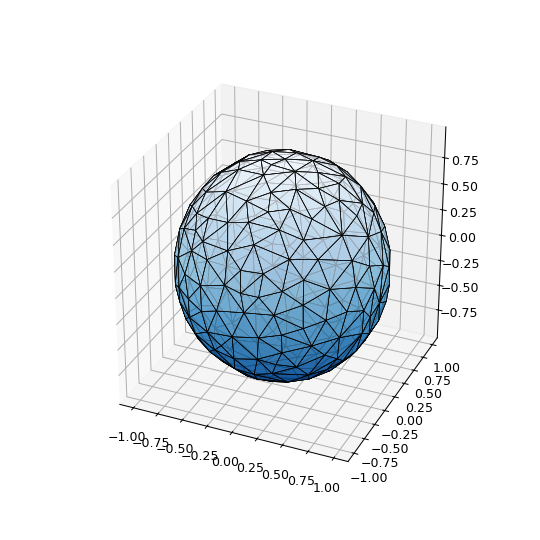

In [8]:
plot_mesh(mesh.points, mesh.cells[0].data)

In [9]:
ds = code.imaging.Emory4DCTDataset('../data/Emory-4DCT')
ds

Emory4DCTDataset([
  Emory4DCTCase('../data/Emory-4DCT', 'Case1Pack', 10 phases),
  Emory4DCTCase('../data/Emory-4DCT', 'Case2Pack', 10 phases),
  Emory4DCTCase('../data/Emory-4DCT', 'Case3Pack', 10 phases),
  Emory4DCTCase('../data/Emory-4DCT', 'Case4Pack', 10 phases),
  Emory4DCTCase('../data/Emory-4DCT', 'Case5Pack', 10 phases),
  Emory4DCTCase('../data/Emory-4DCT', 'Case6Pack', 10 phases),
  Emory4DCTCase('../data/Emory-4DCT', 'Case7Pack', 10 phases),
  Emory4DCTCase('../data/Emory-4DCT', 'Case8Deploy', 10 phases),
  Emory4DCTCase('../data/Emory-4DCT', 'Case9Pack', 10 phases),
  Emory4DCTCase('../data/Emory-4DCT', 'Case10Pack', 10 phases)
])

In [11]:
ds.load_niftis()
ds.load_masks(roi='lung_combined_mask')

Loading ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T00.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T10.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T20.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T30.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T40.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T50.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T60.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T70.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T80.nii.gz
Loading ../data/Emory-4DCT/Case1Pack/NIFTI/case1_T90.nii.gz
Loading ../data/Emory-4DCT/Case2Pack/NIFTI/case2_T00.nii.gz
Loading ../data/Emory-4DCT/Case2Pack/NIFTI/case2_T10.nii.gz
Loading ../data/Emory-4DCT/Case2Pack/NIFTI/case2_T20.nii.gz
Loading ../data/Emory-4DCT/Case2Pack/NIFTI/case2_T30.nii.gz
Loading ../data/Emory-4DCT/Case2Pack/NIFTI/case2_T40.nii.gz
Loading ../data/Emory-4DCT/Case2Pack/NIFTI/case2_T50.nii.gz
Loading ../data/Emory-4DCT/Case2Pack/NIF

Loading ../data/Emory-4DCT/Case3Pack/TotalSegment/case3_T90/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case4Pack/TotalSegment/case4_T00/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case4Pack/TotalSegment/case4_T10/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case4Pack/TotalSegment/case4_T20/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case4Pack/TotalSegment/case4_T30/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case4Pack/TotalSegment/case4_T40/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case4Pack/TotalSegment/case4_T50/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case4Pack/TotalSegment/case4_T60/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case4Pack/TotalSegment/case4_T70/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case4Pack/TotalSegment/case4_T80/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case4Pack/TotalSegment/case4_T90/lung_combined_mask.nii.gz
Loading ../data/Emory-4DCT/Case5Pack/TotalSegment/case

FileNotFoundError: No such file or no access: '../data/Emory-4DCT/Case8Deploy/TotalSegment/case8_T00/lung_combined_mask.nii.gz'

In [12]:
ds[0].mask

<xarray.DataArray 'mask' (phase: 10, x: 256, y: 256, z: 94)> Size: 493MB
array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
...
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]]]])
Coordinates:
  * phase    (phase) int64 80B 0 10 20 30 40 50 60 70 80 90
  * x        (x) float64 2kB 0.0 0.97 1.94 2.91 3.88 ... 244.4 245.4 246.4 247.4
  * y        (y) float64 2kB 0.0 0.97 1.94 2.91 3.88 ... 244.4 245.4 246.4 247.4
  * z        (z) float64 752B 0.0 2.5 5.0 7.5 10.0 ... 225.0 227.5 230.0 232.5

In [26]:
array = ds[0].mask.values[0].astype(np.uint16)
mesh = pygalmesh.generate_from_array(array, voxel_size=ds[0].resolution, max_cell_circumradius=5.0)
print(mesh.points.shape)
print(mesh.cells[0].data.shape)
print(mesh.cells[1].data.shape)

(15212, 3)
(19832, 3)
(77691, 4)


<IPython.core.display.Javascript object>


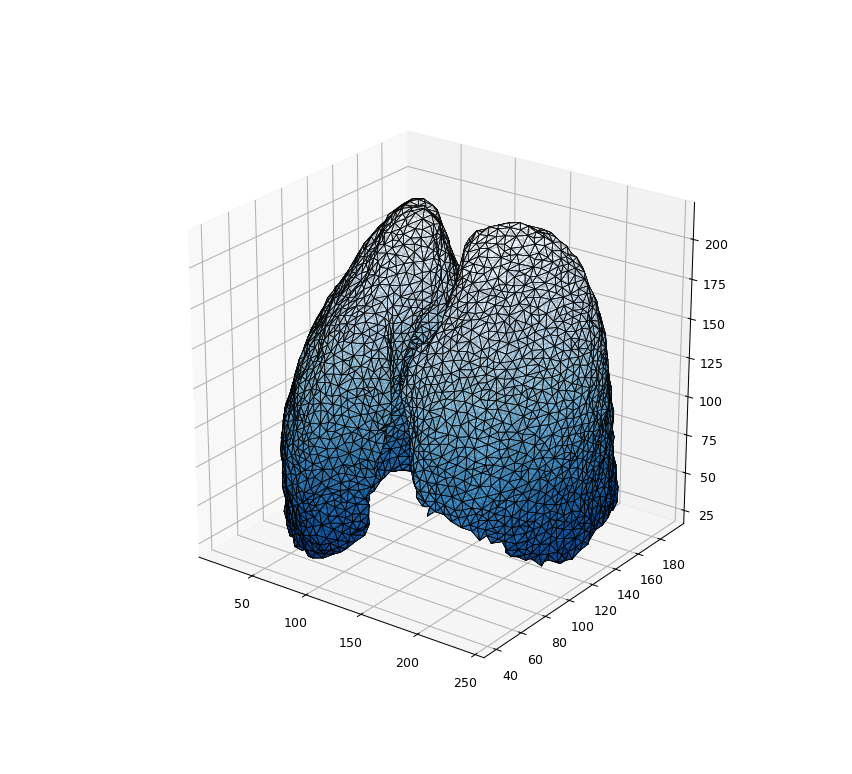

In [27]:
plot_mesh(mesh.points, mesh.cells[0].data)